In [1]:
from __future__ import print_function
import torch
import numpy as np
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
#normalize y to [-1,1]
def normalize(y):  
    ys=np.array([2*(i-y.min())/(y.max()-y.min())-1 for i in y])
    return ys

In [3]:
#RBF kernel 
def rbf_kernel(x1, x2, variance = 0.1):
    return exp(-1 * ((x1-x2) ** 2) / (2*variance))

def gram_matrix(xs):
    return [[rbf_kernel(x1,x2) for x2 in xs] for x1 in xs]

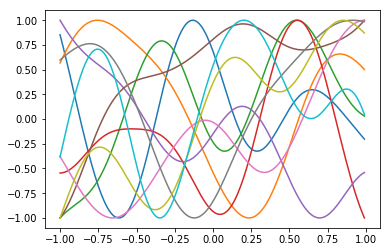

In [4]:
#Generate GP function 
#n functions
n=10

# X=[-1,1] space=0.01
xs = np.arange(-1, 1, 0.01)
mean = [0 for x in xs]
gram = gram_matrix(xs)

func = []

for i in range(n):
    ys = np.random.multivariate_normal(mean, gram)
    y_nor=normalize(ys)
    func.extend([y_nor])

for i in range(n):    
    plt.plot(xs,func[i])
plt.show()

#save function = traindata_#num
#torch.save(func, open('traindata_50000.pt', 'wb'))

In [18]:
#func = torch.load('traindata_50000.pt')

In [25]:
#multifidelity

func_mf=[]


for k in range(n):
    
    #select five points
    x_mf=[]
    y_mf=[]
    for i in range(len(xs)):
        if i % 50 == 0:
            x_mf.extend([xs[i]])
            y_mf.extend([func[k][i]])
    x_mf.extend([xs[-1]])
    y_mf.extend([func[k][-1]])

    #generate fidelity
    xs_mf= np.linspace(-1, 1, 100)
    rbf = scipy.interpolate.Rbf(x_mf, y_mf, function='gaussian',epsilon=0.45)
    func_mf.extend([rbf(xs_mf)])

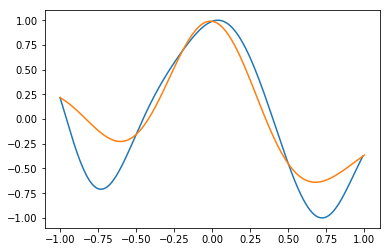

In [26]:
for i in range(n):
    plt.plot(xs,func[i])
    plt.plot(xs_mf,func_mf[i])
plt.show()

In [8]:
#save function = traindata_#num_fidelity2
#torch.save(func_mf, open('traindata_50000_fidelity2.pt', 'wb'))